In [266]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [330]:
#convert .csv file into dataframe
ds=pd.read_csv("salary.csv")
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


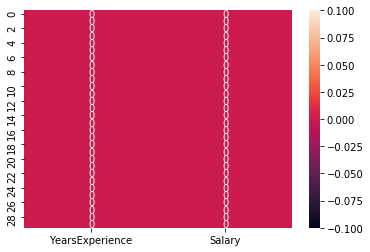

In [331]:
#plot the heatmap to see if null values are present
sns.heatmap(ds.isnull(),annot=True)
plt.show()


In [332]:
ds.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

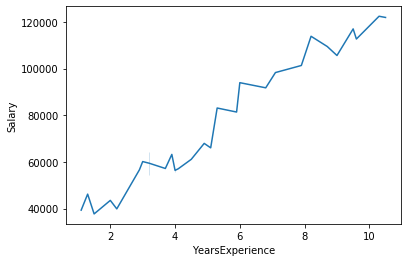

In [360]:
sns.lineplot(x=ds["YearsExperience"],y=ds["Salary"])
plt.show()

In [333]:
ds.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [334]:
from scipy.stats import zscore
z_score=abs(zscore(ds,axis=1))
print(z_score)

print(ds.shape)

ds_f=ds.loc[(z_score<3).all(axis=1)]
print(ds_f)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
(30, 2)
    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
2

In [349]:
#dividing independent and dependent variables
x = ds_f.iloc[:, :-1]
y = ds_f.iloc[:, 1]

In [350]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [351]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [352]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)
 
print(sc.transform(x))


[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]
 [ 1.21377673]
 [ 1.32129632]
 [ 1.50049564]
 [ 1.5363355 ]
 [ 1.78721455]
 [ 1.85889428]]
[[-2.44549236]
 [-2.41980244]
 [-2.39411252]
 [-2.32988773]
 [-2.30419781]
 [-2.2142831 ]
 [-2.20143815]
 [-2.17574823]
 [-2.17574823]
 [-2.11152344]
 [-2.08583352]
 [-2.07298856]
 [-2.07298856]
 [-2.0601436 ]
 [-2.00876377]
 [-1.95738393]
 [-1.93169402]
 [-1.9060041 ]
 [-1.82893435]
 [-1.81608939]
 [-1.71332972]
 [-1.67479485]
 [-1.57203518]
 [-1.5335003 ]
 [-1.46927551]
 [-1.43074064]
 [-1.36651584]
 [-1.35367088]
 [-1.26375618]
 [-1.23806626]]


In [353]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state," is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
        
print()
print()
print("max_r2_score corresponding to ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state: 42  is: 0.9024461774180499
r2_score corresponding to random state: 43  is: 0.8688045158887868
r2_score corresponding to random state: 44  is: 0.9349511170439279
r2_score corresponding to random state: 45  is: 0.9250487875802144
r2_score corresponding to random state: 46  is: 0.9789129767378081
r2_score corresponding to random state: 47  is: 0.98399193890564
r2_score corresponding to random state: 48  is: 0.980277279178695
r2_score corresponding to random state: 49  is: 0.9497670285223544
r2_score corresponding to random state: 50  is: 0.882467963516984
r2_score corresponding to random state: 51  is: 0.9608624689052039
r2_score corresponding to random state: 52  is: 0.9743646706957548
r2_score corresponding to random state: 53  is: 0.9501154883629507
r2_score corresponding to random state: 54  is: 0.949272996884066
r2_score corresponding to random state: 55  is: 0.8924137091604103
r2_score corresponding to random state: 56  is: 0.9804067424885894


In [354]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()

-0.0533642768450965

In [356]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [357]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is:" , np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score is:  0.9861836585536035
RMSE is: 3427.517525649159


In [358]:
#saving the data file using joblib
from sklearn.externals import joblib
joblib.dump(lr,'lr_salary.pkl')

['lr_salary.pkl']